In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [4]:
sample_info = pd.read_csv('middle_sample_info.csv', index_col=0)
results = pd.read_csv('middle_final_results.csv', index_col=0)

In [29]:
df = pd.read_csv('data/rep6/middle_exp_mat.csv', index_col=0)
df = df.loc[sample_info.index]
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes

dfm = np.log10(df + 1)

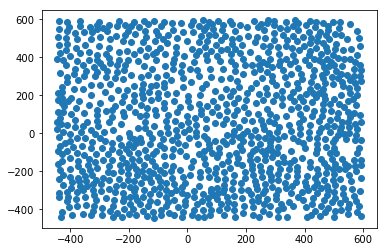

In [10]:
plt.scatter(sample_info.abs_X, sample_info.abs_Y);

In [33]:
results['pval'] = results['pval'].clip_lower(results.query('pval > 0')['pval'].min() / 2)

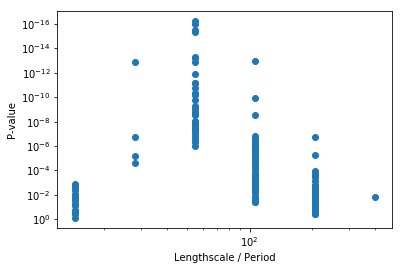

In [34]:
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

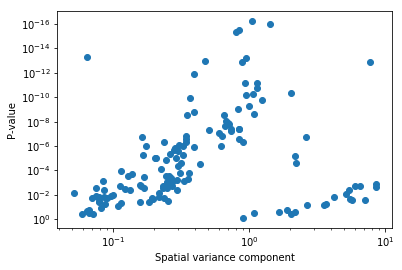

In [35]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

In [36]:
import SpatialDE

In [37]:
results['qval'] = SpatialDE.util.qvalue(results.pval, pi0=1)

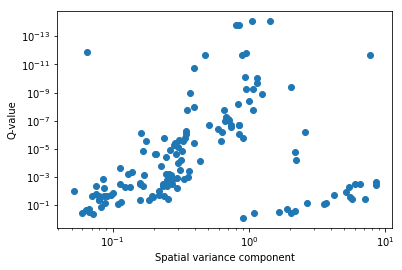

In [38]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('Q-value');

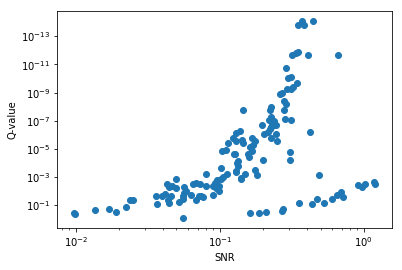

In [46]:
plt.loglog()
plt.scatter(1./results.max_delta, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('Q-value');

In [40]:
results.query('qval < 0.05').shape

(122, 15)

In [41]:
N = 5
top_per_ls = results.query('qval < 0.05') \
                  .sort_values('qval', ascending=True) \
                  .groupby('l') \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])
                
top_per_ls

,g,max_delta,max_ll,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_null,LLR,pval,qval
16,SLC35B4,0.855660,-741.748833,-4.430907,8.477460,1056,0.000631,14.490174,4,SE,1511.346639,-752.024560,10.275727,1.347917e-03,2.329733e-03
1,ANKH,0.978605,-745.713801,-3.797725,5.946227,1056,0.000669,14.490174,4,SE,1519.276576,-755.506129,9.792328,1.752415e-03,2.850931e-03
9,FBN1,0.831139,-713.179570,-3.870081,6.561139,1056,0.000673,14.490174,4,SE,1454.208113,-722.969426,9.789856,1.754772e-03,2.850931e-03
11,PHIP,1.093366,-670.773896,-4.660849,8.478506,1056,0.000617,14.490174,4,SE,1369.396766,-679.926530,9.152633,2.483604e-03,3.863384e-03
10,FYCO1,1.037004,-708.137473,-3.659645,5.392508,1056,0.000627,14.490174,4,SE,1444.123919,-716.563258,8.425785,3.699369e-03,5.368860e-03
20,CENPF,1.517295,-1260.528592,-6.732297,7.666613,1056,0.000826,28.116048,4,SE,2548.906157,-1315.229646,54.701055,1.403322e-13,2.182945e-12
22,MYH10,2.357634,-357.394728,-4.234265,2.594877,1056,0.001192,28.116048,4,SE,742.638429,-384.664513,27.269785,1.769551e-07,6.519399e-07
19,CDYL2,3.272592,-644.749165,-4.110561,2.174463,1056,0.001414,28.116048,4,SE,1317.347305,-665.034198,20.285033,6.672049e-06,1.668012e-05
21,HERC2,3.274197,-471.500501,-4.158030,2.209942,1056,0.001432,28.116048,4,SE,970.849975,-489.149651,17.649150,2.656340e-05,5.998187e-05
53,THBS1,2.679883,-1175.038404,-4.803833,1.414772,1056,0.000945,54.555049,4,SE,2377.925781,-1244.995950,69.957546,1.110223e-16,7.771561e-15


In [42]:
top_per_ls.shape

(25, 15)

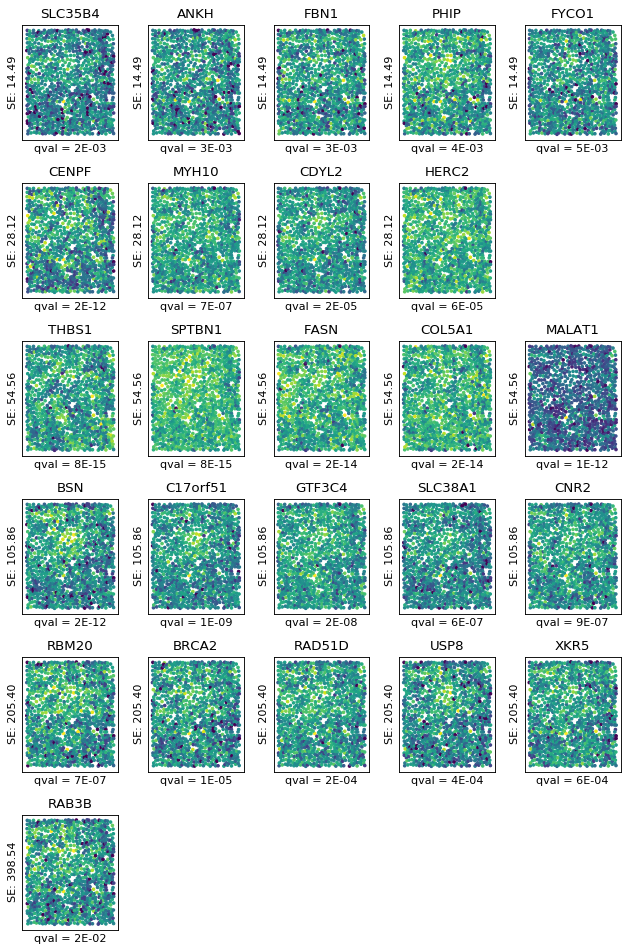

In [76]:
plt.figure(figsize=(8, 12), dpi=80)

N = 5
N_rows = top_per_ls['l'].unique().shape[0]
for j, T in enumerate(top_per_ls.groupby('l')):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        plt.subplot(N_rows, N, j * N + i + 1)
        plt.scatter(sample_info.abs_X, sample_info.abs_Y, c=dfm[r['g']], s=5);
        plt.title(r['g'])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('qval = {:.0E}'.format(r['qval']))
        if True:
            plt.ylabel('{}: {:.2f}'.format(r['model'], r['l']))

plt.tight_layout()
# plt.savefig('top_MF_genes_per_ls.pdf')

In [48]:
from adjustText import adjust_text

12


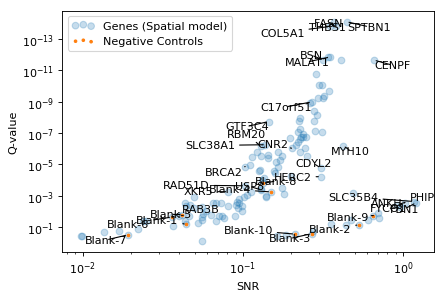

In [64]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')

tmp = results.query('model == "SE"')
plt.scatter(1./tmp['max_delta'], tmp['qval'],
            alpha=0.25, rasterized=True, label='Genes (Spatial model)', marker='o', color='C0');

blanks = results[results.g.str.startswith('Blank')]
plt.scatter(1./blanks['max_delta'], blanks['qval'], s=5, zorder=10, label='Negative Controls', color='C1');


texts = []
for i in top_per_ls.index.union(blanks.index):
    texts.append(plt.text(1./results.loc[i, 'max_delta'], results.loc[i, 'qval'], results.loc[i, 'g']))
    

print(adjust_text(texts, arrowprops=dict(arrowstyle='-'),
                         force_points=0.1,
                         force_text=0.1,
                         force_objects=0.1,
                         zorder=20,
                         x=results['max_s2_t_hat'],
                         y=results['pval']))

plt.xlabel('SNR');
plt.ylabel('Q-value');
plt.gca().invert_yaxis()

plt.legend(scatterpoints=3, loc='upper left');

In [66]:
import NaiveDE

In [67]:
dfm = NaiveDE.stabilize(df.T).T
res = NaiveDE.regress_out(sample_info, dfm.T, 'np.log(cytoplasmArea)').T

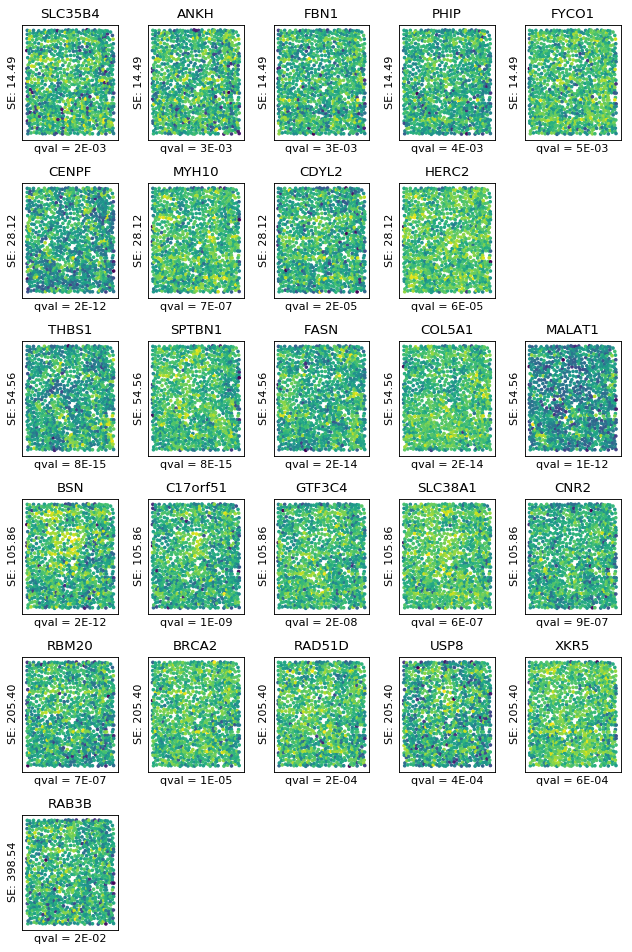

In [69]:
plt.figure(figsize=(8, 12), dpi=80)

N = 5
N_rows = top_per_ls['l'].unique().shape[0]
for j, T in enumerate(top_per_ls.groupby('l')):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        plt.subplot(N_rows, N, j * N + i + 1)
        plt.scatter(sample_info.abs_X, sample_info.abs_Y, c=res[r['g']], s=5);
        plt.title(r['g'])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('qval = {:.0E}'.format(r['qval']))
        if True:
            plt.ylabel('{}: {:.2f}'.format(r['model'], r['l']))

plt.tight_layout()
# plt.savefig('top_MF_genes_per_ls.pdf')

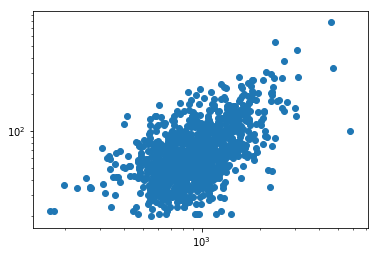

In [72]:
plt.loglog()
plt.scatter(sample_info.cytoplasmArea, df.MALAT1);

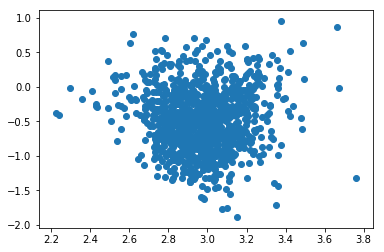

In [75]:
plt.scatter(np.log10(sample_info.cytoplasmArea), res.MALAT1);